# Mart Sales EDA

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

### 2. Read Dataset and Explore Basics

In [2]:
Df = pd.read_csv('C:\\Users\\Victor\\Documents\\DATA Analysis\\DATA\\Mart_Sales\\Data1.csv')
Df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
Df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


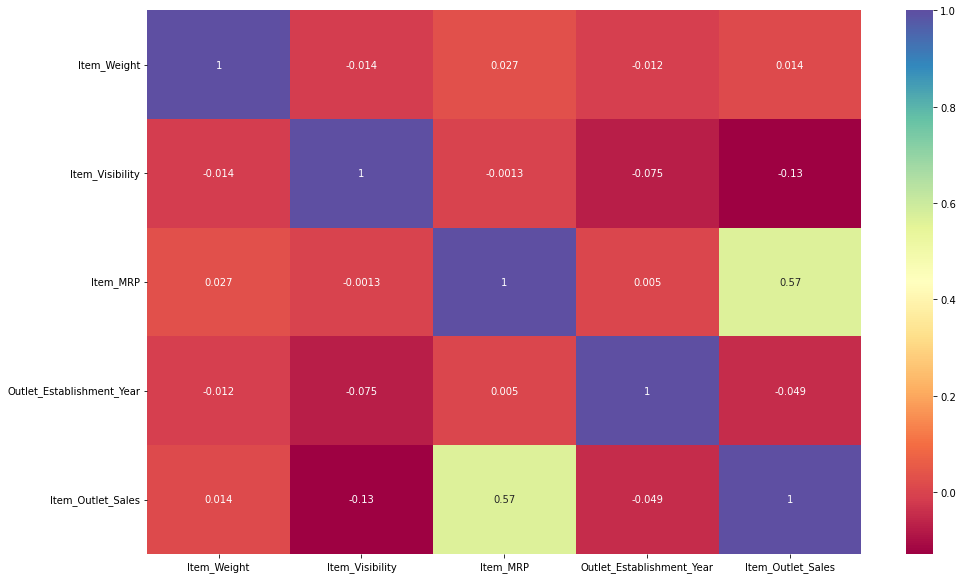

In [83]:
plt.figure(figsize=(16,10))
sns.heatmap(Df.corr(), annot = True, cmap = "Spectral")

plt.show()

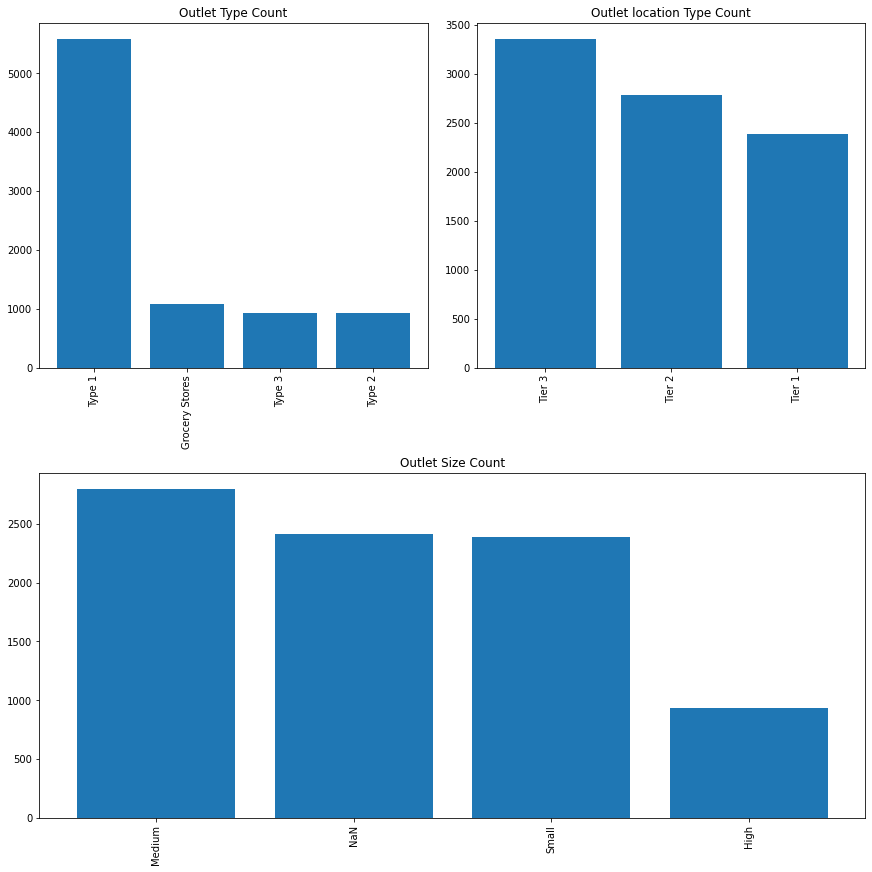

In [171]:
plt.figure(figsize=(12,12), constrained_layout = True)

plt.subplot(2,2,1)
plt.bar(x=('Type 1','Grocery Stores', 'Type 3', 'Type 2'), height = Df['Outlet_Type'].value_counts())
plt.xticks(rotation=90)
plt.title('Outlet Type Count')

plt.subplot(2,2,2)
plt.bar(x=('Tier 3', 'Tier 2', 'Tier 1'), height = Df['Outlet_Location_Type'].value_counts(dropna=False))
plt.xticks(rotation=90)
plt.title('Outlet location Type Count')

plt.subplot(2,2,(3,4))
plt.bar(x=('Medium' , 'NaN' , 'Small', 'High'), height = Df['Outlet_Size'].value_counts(dropna=False))
plt.title('Outlet Size Count')
plt.xticks(rotation=90)


plt.show()

Outlet Type
- We can already argue that the analysis will be biased because of the high number of Type 1 supermarkets.

Outlet Location 
- It reflects the type of city (divided into Tiers, that depend on city population and city developness) in which the outlet is located.
- Tier 1 is the biggest and the most developed type of city.
- Tier 3 type of cities are the most frequent value.

Ouitlet Size
- The Outlet Size is measured in terms of ground area covered. The size corresponding to "high" is the largest one. Interesting to see that a lot of them are not classified.
- Medium sized outlets dominate the dataset.

### 2.1 Plot Data

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

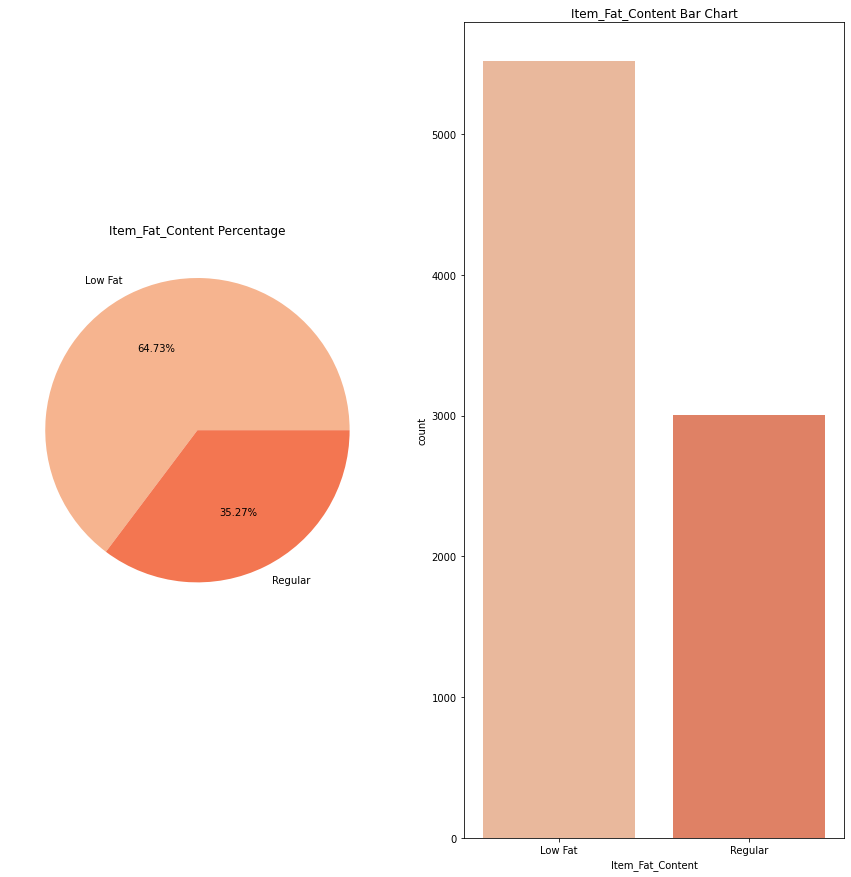

In [84]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('Item_Fat_Content Percentage')
plt.pie(Df['Item_Fat_Content'].value_counts(), 
        labels=Df['Item_Fat_Content'].dropna().unique(), #Drop na and only get unique to set up the labels 
        colors=sns.color_palette('rocket_r'), 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Item_Fat_Content Bar Chart')
sns.countplot(x="Item_Fat_Content", data=Df, palette=sns.color_palette('rocket_r'))


Df['Item_Fat_Content'].value_counts(dropna=False) #Avoids outputting the informative text and simplifies to what is displayed.

#### 2.1.1 Change naming of non-standard values and rerun the plot

In [7]:
Df['Item_Fat_Content'] = Df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat') 
Df['Item_Fat_Content'] = Df['Item_Fat_Content'].replace('reg', 'Regular')

#### 2.1.2 Plot More Data


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

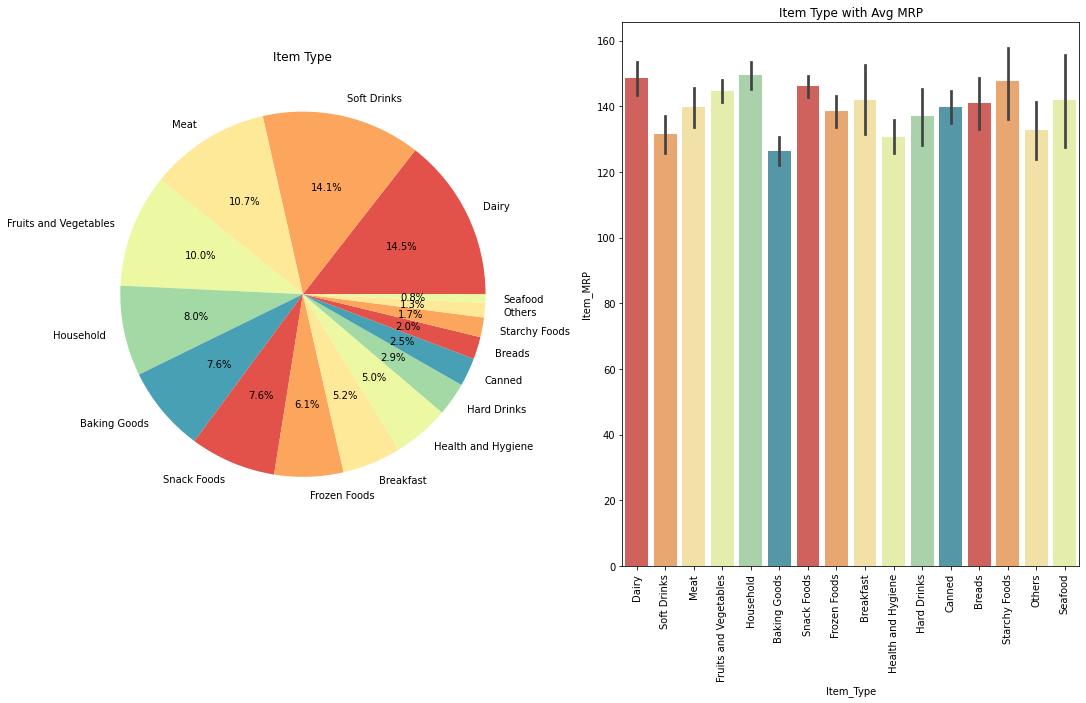

In [89]:
plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Item Type')
plt.pie(Df['Item_Type'].value_counts(),
        labels = Df['Item_Type'].unique(),
        colors = sns.color_palette("Spectral"),
        autopct = '%0.1f%%')

plt.subplot(1,2,2)
plt.title('Item Type with Avg MRP')
sns.barplot(data = Df, x="Item_Type", y = "Item_MRP", palette = sns.color_palette('Spectral'), ci=95) #calculates mean of MRP automatically :)+confidence interval of 95%
plt.xticks(rotation=90)


Df['Item_Type'].value_counts(dropna=False) 

## 3. Exploratory Analysis

### 3.1 New Dataframe with Aggregates

In [9]:
Df_agg = pd.DataFrame()
Df_agg = Df.groupby(['Outlet_Type', 'Item_Type'], as_index = False).agg({'Item_Outlet_Sales': ['sum', 'count'], 'Item_MRP': ['mean']})

Df_agg

Outlet_Type      Item_Type Item_Outlet_Sales          Item_MRP
                                                   sum count        mean
0       Grocery Store   Baking Goods        24827.0162    85  126.438068
1       Grocery Store         Breads        12604.9256    33  146.452873
2       Grocery Store      Breakfast         7843.7898    19  147.026989
3       Grocery Store         Canned        25759.1362    73  138.080808
4       Grocery Store          Dairy        31451.7262    92  147.166715
..                ...            ...               ...   ...         ...
59  Supermarket Type3         Others        40513.9300    15  106.779053
60  Supermarket Type3        Seafood        18809.5158     7  124.028286
61  Supermarket Type3    Snack Foods       513088.1172   137  144.574508
62  Supermarket Type3    Soft Drinks       147822.2476    45  123.313587
63  Supermarket Type3  Starchy Foods        49170.6616    14  143.078386

[64 rows x 5 columns]

### 3.2 Plot the aggregate sales per Outlet Type

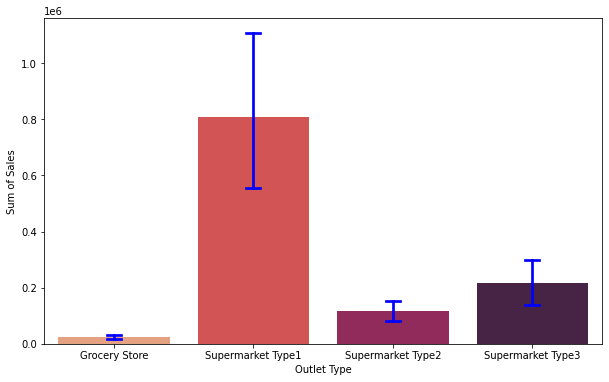

In [10]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data = Df_agg, x = 'Outlet_Type', y = Df_agg['Item_Outlet_Sales']['sum'] , 
            palette = 'rocket_r', ci = 95, errcolor = 'blue', capsize = 0.1)
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Sum of Sales')
plt.show()

In [11]:
Df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

We expect to see supermarkets Type 1 selling 5 times more than others, since the total number of outlets within that category, is approx. 5 times higher than on the others.

### 3.3 What are Supermarket Type 1 outlets selling?

In [12]:

Dft1 = Df.loc[Df['Outlet_Type'] == 'Supermarket Type1']
Dft1 = Dft1[['Item_Type', 'Item_Outlet_Sales']]
Dft1 = Dft1.groupby(['Item_Type'], dropna=False, as_index = False).agg([('Item_Outlet_Sales','sum')]).reset_index()
Dft1

,Item_Type,Item_Outlet_Sales
,,Item_Outlet_Sales
0,Baking Goods,8.954611e+05
1,Breads,3.755085e+05
2,Breakfast,1.515268e+05
3,Canned,1.000560e+06
4,Dairy,1.076694e+06
5,Frozen Foods,1.292668e+06
6,Fruits and Vegetables,1.931958e+06
7,Hard Drinks,3.235542e+05
8,Health and Hygiene,7.127549e+05


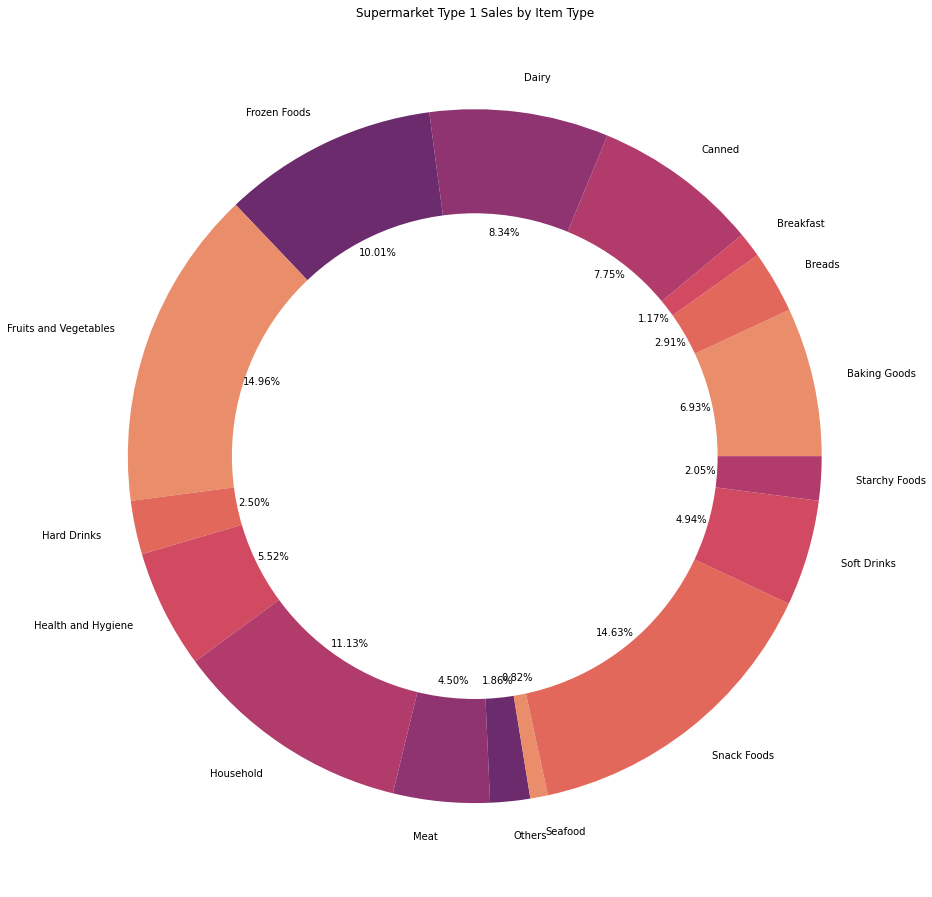

In [13]:
plt.figure(figsize=(25,20), constrained_layout = True)

plt.subplot(1,2,1)
plt.title('Supermarket Type 1 Sales by Item Type')
plt.pie(Dft1['Item_Outlet_Sales']['Item_Outlet_Sales'], 
        labels=Dft1['Item_Type'], 
        colors=sns.color_palette('flare'), 
        autopct='%.2f%%', pctdistance = 0.65, labeldistance = 1.1) #we can choose where to put the labels(both numbers and text)
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.show()

### 3.3.1 Are these products Low Fat or Regular Fat?

In [14]:
Dft1F = Df.loc[Df['Outlet_Type'] == 'Supermarket Type1']
Dft1F = Dft1F[['Item_Type', 'Item_Outlet_Sales', 'Item_Fat_Content']]
Dft1F = Dft1F.groupby(['Item_Type','Item_Fat_Content'], dropna=False, as_index = False).agg([('Item_Outlet_Sales','sum')]).reset_index()


Dft1F

,Item_Type,Item_Fat_Content,Item_Outlet_Sales
,,,Item_Outlet_Sales
0,Baking Goods,Low Fat,4.050794e+05
1,Baking Goods,Regular,4.903817e+05
2,Breads,Low Fat,2.008712e+05
3,Breads,Regular,1.746373e+05
4,Breakfast,Low Fat,6.687961e+04
5,Breakfast,Regular,8.464715e+04
6,Canned,Low Fat,5.279142e+05
7,Canned,Regular,4.726461e+05
8,Dairy,Low Fat,6.612646e+05


#### Remove Health & Hygiene, Others, Household and Hard Drinks from the above list: Irrelevant for this part

In [15]:
Dft1F = Dft1F.drop([15,19,16,14])
Dft1F = Dft1F.reset_index(drop = True) #resets index after droping values


#### Plot the data into a Bar chart

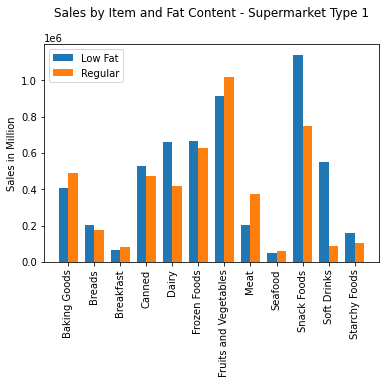

In [95]:

labels = Dft1F['Item_Type'].unique()
Low_Fat = Dft1F.loc[Dft1F['Item_Fat_Content'] == 'Low Fat']['Item_Outlet_Sales']['Item_Outlet_Sales']
Reg_Fat = Dft1F.loc[Dft1F['Item_Fat_Content'] == 'Regular']['Item_Outlet_Sales']['Item_Outlet_Sales']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Low_Fat, width, label='Low Fat')
rects2 = ax.bar(x + width/2, Reg_Fat, width, label='Regular')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales in Million')
ax.set_title('Sales by Item and Fat Content - Supermarket Type 1', y=1.1)
ax.set_xticks(x, labels)
ax.legend()
plt.xticks(rotation = 90)


plt.show()


Low Fat Snack Food seems to be top sales item for Type 1 Supermarkets

### 3.3.2 Drill into the Snack Foods Sales

In [96]:
Dft1FS = Df.loc[(Df['Outlet_Type'] == 'Supermarket Type1') & (Df['Item_Type'] == 'Snack Foods')]
Dft1FS.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
13,FDS46,17.600,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076
20,FDN22,18.850,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860
26,FDV10,7.645,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Small,Tier 2,Supermarket Type1,1065.2800
42,FDA46,13.600,Low Fat,0.117818,Snack Foods,192.9136,OUT049,1999,Medium,Tier 1,Supermarket Type1,2527.3768


#### Snack Food Sales for Type 1 Supermarkets - Correlations

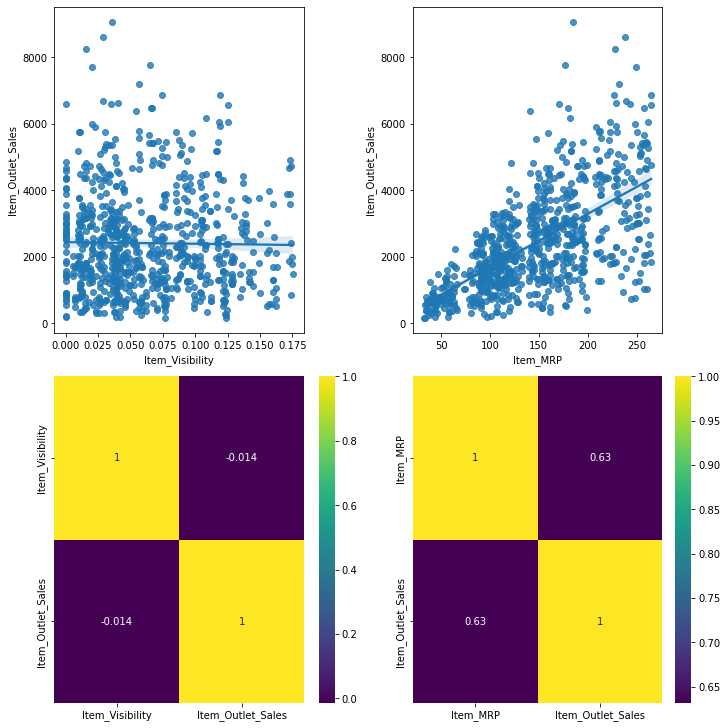

In [97]:
plt.figure(figsize=(10,10),constrained_layout = True)

plt.subplot(2,2,1)
sns.regplot(x="Item_Visibility", y="Item_Outlet_Sales", data=Dft1FS);


plt.subplot(2,2,2)
sns.regplot(x="Item_MRP", y="Item_Outlet_Sales", data=Dft1FS);

plt.subplot(2,2,3)
sns.heatmap(Dft1FS[['Item_Visibility','Item_Outlet_Sales']].corr(), annot = True, cmap = "viridis")

plt.subplot(2,2,4)
sns.heatmap(Dft1FS[['Item_MRP','Item_Outlet_Sales']].corr(), annot = True, cmap = "viridis")

plt.show()

#### We observe heteroscedastic results in our regressions. We won't use log transformations or anything similar as we only wanted to take a general look at the data

### 3.3.3 Which Outlet locations out of Type 1 Supermarkets are selling the most Snack Foods?

##### Group the data

In [98]:
Dft1FS_Group = Dft1FS[['Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales']]
Dft1FS_Group = Dft1FS_Group.groupby(['Outlet_Size', 'Outlet_Location_Type'], dropna=False, as_index = False).agg([('Item_Outlet_Sales','sum')]).reset_index()
Dft1FS_Group.head()

,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
,,,Item_Outlet_Sales
0,High,Tier 3,309246.1234
1,Medium,Tier 1,350244.0900
2,Small,Tier 1,274813.6106
3,Small,Tier 2,355573.8190
4,NaN,Tier 2,599509.6230


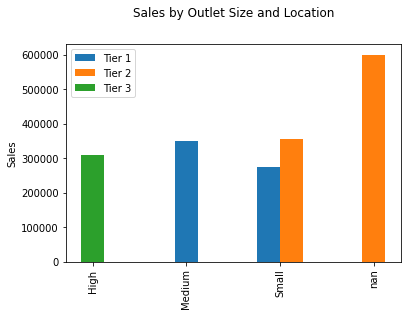

In [99]:

labels = Dft1FS_Group['Outlet_Size'].unique()
Tier1 = Dft1FS_Group.loc[Dft1FS_Group['Outlet_Location_Type'] == 'Tier 1']['Item_Outlet_Sales']['Item_Outlet_Sales']
Tier2 = Dft1FS_Group.loc[Dft1FS_Group['Outlet_Location_Type'] == 'Tier 2']['Item_Outlet_Sales']['Item_Outlet_Sales']
Tier3 = Dft1FS_Group.loc[Dft1FS_Group['Outlet_Location_Type'] == 'Tier 3']['Item_Outlet_Sales']['Item_Outlet_Sales']

width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar((1,2-width/2), Tier1, width, label = 'Tier 1')
rects2 = ax.bar((2+width/2,3), Tier2, width, label = 'Tier 2') #I have manually set the coordinates. Could be done automatically using x and width.
rects3 = ax.bar((0,0), Tier3, width, label = 'Tier 3')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales')
ax.set_title('Sales by Outlet Size and Location', y=1.1)
ax.set_xticks([0.0, 1.0, 2.0, 3.0], labels)
ax.legend()
plt.xticks(rotation = 90)

plt.show()

#### There are a lot of unclassified sales for Tier 2 Outlets. We don't know the size of the Outlet.

### 3.4 What are the rest of Supermarkets selling?

In [118]:
Dft23 = Df.loc[Df['Outlet_Type'] != 'Supermarket Type1']
Dft23 = Dft23[['Outlet_Type','Item_Type' ,'Item_Outlet_Sales']]
Dft23 = Dft23.groupby(['Outlet_Type','Item_Type'], dropna=False, as_index = False).agg([('Item_Outlet_Sales','sum')]).reset_index()
Dft23.head()

,Outlet_Type,Item_Type,Item_Outlet_Sales
,,,Item_Outlet_Sales
0,Grocery Store,Baking Goods,24827.0162
1,Grocery Store,Breads,12604.9256
2,Grocery Store,Breakfast,7843.7898
3,Grocery Store,Canned,25759.1362
4,Grocery Store,Dairy,31451.7262


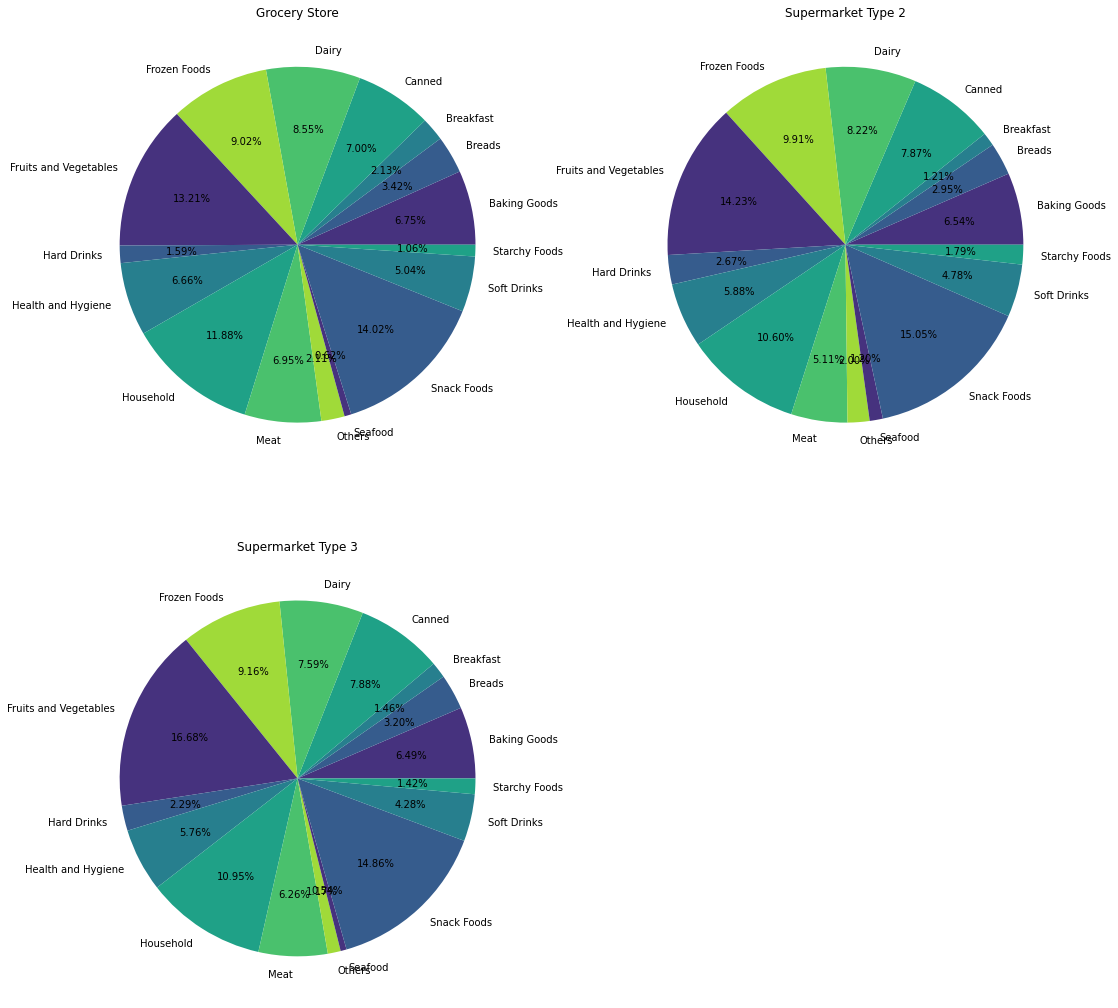

In [102]:
plt.figure(figsize=(18,18))

plt.subplot(2,2,1)
plt.pie(Dft23[Dft23['Outlet_Type'] == 'Grocery Store']['Item_Outlet_Sales']['Item_Outlet_Sales'],
        labels=Dft23['Item_Type'].unique(), 
        colors=sns.color_palette('viridis'), 
        autopct='%.2f%%', pctdistance = 0.65, labeldistance = 1.1) #we can choose where to put the labels(both numbers and text)
plt.title('Grocery Store')

plt.subplot(2,2,2)
plt.pie(Dft23[Dft23['Outlet_Type'] == 'Supermarket Type2']['Item_Outlet_Sales']['Item_Outlet_Sales'],
        labels=Dft23['Item_Type'].unique(), 
        colors=sns.color_palette('viridis'), 
        autopct='%.2f%%', pctdistance = 0.65, labeldistance = 1.1) #we can choose where to put the labels(both numbers and text)
plt.title('Supermarket Type 2')

plt.subplot(2,2,3)
plt.pie(Dft23[Dft23['Outlet_Type'] == 'Supermarket Type3']['Item_Outlet_Sales']['Item_Outlet_Sales'],
        labels=Dft23['Item_Type'].unique(), 
        colors=sns.color_palette('viridis'), 
        autopct='%.2f%%', pctdistance = 0.65, labeldistance = 1.1) #we can choose where to put the labels(both numbers and text)
plt.title('Supermarket Type 3')
plt.show()


A very similar distribution of products on these three supermarkets. When comparing to Supermarket Type 1, we also see a similar behaviour.


### 3.4.1 What is the percentage of Low Fat vs High Fat products sold?

In [103]:
Dft23F = Df.loc[Df['Outlet_Type'] != 'Supermarket Type1']
Dft23F = Dft23F[['Outlet_Type', 'Item_Outlet_Sales', 'Item_Fat_Content']]
Dft23F = Dft23F.groupby(['Outlet_Type','Item_Fat_Content'], dropna=False, as_index = False).agg([('Item_Outlet_Sales','sum')]).reset_index()

Dft23F

,Outlet_Type,Item_Fat_Content,Item_Outlet_Sales
,,,Item_Outlet_Sales
0,Grocery Store,Low Fat,2.406814e+05
1,Grocery Store,Regular,1.273529e+05
2,Supermarket Type2,Low Fat,1.201305e+06
3,Supermarket Type2,Regular,6.505179e+05
4,Supermarket Type3,Low Fat,2.204588e+06
5,Supermarket Type3,Regular,1.249338e+06


In [104]:
#Small dataframe that gets all Data for Supermarket Type 1 grouped by Fat content.
A = Df.loc[Df['Outlet_Type'] == 'Supermarket Type1']
A = A[['Item_Outlet_Sales', 'Item_Fat_Content']]
A = A.groupby(['Item_Fat_Content'], dropna=False, as_index = False).agg([('Item_Outlet_Sales','sum')]).reset_index()

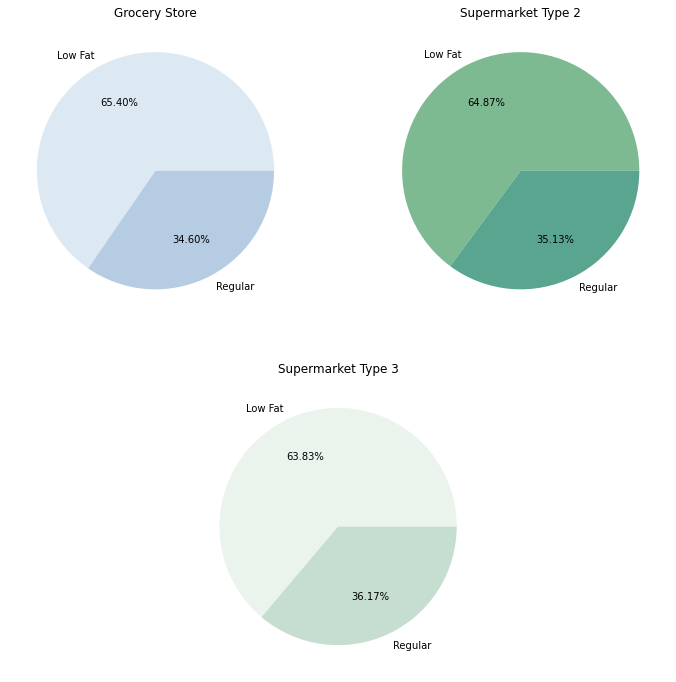

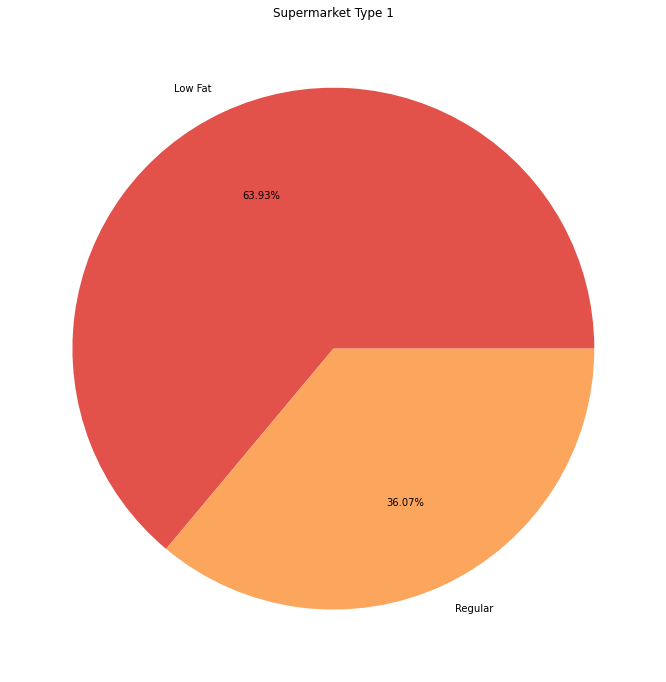

In [105]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.pie(Dft23F[Dft23F['Outlet_Type'] == 'Grocery Store']['Item_Outlet_Sales']['Item_Outlet_Sales'],
        labels=Dft23F['Item_Fat_Content'].unique(), 
        colors=sns.color_palette('BuPu'), 
        autopct='%.2f%%', pctdistance = 0.65, labeldistance = 1.1) 
plt.title('Grocery Store')


plt.subplot(2,2,2)
plt.pie(Dft23F[Dft23F['Outlet_Type'] == 'Supermarket Type2']['Item_Outlet_Sales']['Item_Outlet_Sales'],
        labels=Dft23F['Item_Fat_Content'].unique(), 
        colors=sns.color_palette('crest'), 
        autopct='%.2f%%', pctdistance = 0.65, labeldistance = 1.1) 
plt.title('Supermarket Type 2')

plt.subplot(2,2,(3,4))
plt.pie(Dft23F[Dft23F['Outlet_Type'] == 'Supermarket Type3']['Item_Outlet_Sales']['Item_Outlet_Sales'],
        labels=Dft23F['Item_Fat_Content'].unique(), 
        colors=sns.light_palette('seagreen'), 
        autopct='%.2f%%', pctdistance = 0.65, labeldistance = 1.1) 
plt.title('Supermarket Type 3')


plt.show()

plt.figure(figsize = (12,12))
plt.pie(A['Item_Outlet_Sales']['Item_Outlet_Sales'], labels = ('Low Fat', 'Regular'),
        colors = sns.color_palette('Spectral'),
        autopct = '%.2f%%', pctdistance = 0.65, labeldistance = 1.1)
plt.title('Supermarket Type 1')

plt.show()


Again, a very similar distribution in terms of fat content.

### 3.4.2 Which Outlet Locations out of these Supermarket Types are selling the most in general?

#### Group the Data again

In [184]:
Dft23_G = Df.loc[Df['Outlet_Type'] != 'Supermarket Type1']
Dft23_G = Dft23_G[['Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales']]
Dft23_G = Dft23_G.groupby(['Outlet_Size', 'Outlet_Location_Type'], dropna = False, as_index = False).agg([('Item_Outlet_Sales','sum')]).reset_index()
Dft23_G

,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
,,,Item_Outlet_Sales
0,Medium,Tier 3,5.305749e+06
1,Small,Tier 1,1.796941e+05
2,NaN,Tier 3,1.883402e+05


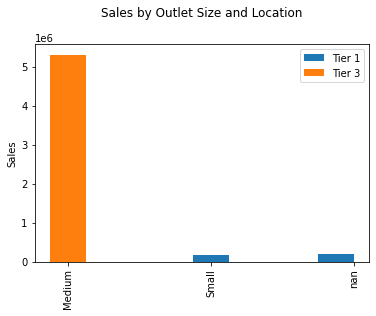

In [185]:

labels = Dft23_G['Outlet_Size'].unique()
Tier1 = Dft23_G.loc[Dft1FS_Group['Outlet_Location_Type'] == 'Tier 1']['Item_Outlet_Sales']['Item_Outlet_Sales']
Tier2 = Dft23_G.loc[Dft1FS_Group['Outlet_Location_Type'] == 'Tier 2']['Item_Outlet_Sales']['Item_Outlet_Sales']
Tier3 = Dft23_G.loc[Dft1FS_Group['Outlet_Location_Type'] == 'Tier 3']['Item_Outlet_Sales']['Item_Outlet_Sales']

width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar((1,2-width/2), Tier1, width, label = 'Tier 1')
rects3 = ax.bar((0,0), Tier3, width, label = 'Tier 3')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales')
ax.set_title('Sales by Outlet Size and Location', y=1.1)
ax.set_xticks([0.0, 1.0, 2.0], labels)
ax.legend()
plt.xticks(rotation = 90)

plt.show()

For this group of Outlet Types (Grocery Stores, Type 2 and Type 3 Supermarkets) most of the sales are coming from Tier 3 and Medium Outlets. As it can be seen, there are no Tier 2 Outlets within this group.